
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the dow30 and alabama.  Construct portfolios from the Investment Options in the dow30+alabama and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy', 'alabama-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,-25.29,-15.88,45.14,-0.36,1.44,16.30,8.97,30.93,1.44,0.05
1,AXP,American Express,US Stocks:Financials,-14.19,48.78,60.38,23.75,20.79,23.79,17.19,27.00,20.79,0.77
2,AMGN,Amgen,US Stocks:Healthcare,-56.87,-56.75,-10.89,7.51,4.52,15.86,11.25,24.63,4.52,0.18
3,AMZN,Amazon,US Stocks:Consumer Discretionary,69.85,101.83,46.88,9.18,18.98,27.12,16.18,34.32,18.98,0.55
4,AAPL,Apple,US Stocks:Technology,23.55,34.27,32.00,11.38,28.11,18.36,12.27,26.02,28.11,1.08
5,BA,Boeing,US Stocks:Industrials,206.83,59.69,-31.73,-5.50,-11.93,26.79,13.49,40.97,-11.93,-488.77
6,CAT,Caterpillar,US Stocks:Industrials,-74.00,-29.51,24.88,22.57,22.17,17.73,14.57,36.37,22.17,0.61
7,CVX,Chevron,US Stocks:Energy,-70.04,-10.77,1.34,11.41,8.64,21.43,16.43,28.17,8.64,0.31
8,CSCO,Cisco,US Stocks:Technology,-6.46,59.13,20.82,0.47,7.73,12.73,7.76,20.89,7.73,0.37
9,KO,Coca-Cola,US Stocks:Consumer Staples,-29.26,-42.48,5.73,4.45,5.33,14.51,8.19,14.16,5.33,0.38


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
21,NVDA,Nvidia,US Stocks:Technology,-2.65,83.46,187.22,66.53,88.68,34.71,16.13,54.03,88.68,1.64
30,ROAD,Construction Partners Inc,US Stocks:Industrials,-79.31,179.83,106.93,43.05,39.01,34.22,26.82,35.83,39.01,1.09
4,AAPL,Apple,US Stocks:Technology,23.55,34.27,32.00,11.38,28.11,18.36,12.27,26.02,28.11,1.08
19,MSFT,Microsoft,US Stocks:Technology,-29.55,1.40,13.48,7.82,22.61,18.81,14.02,21.65,22.61,1.04
29,WMT,Walmart,US Stocks:Consumer Discretionary,-27.41,58.18,71.53,25.45,19.50,18.49,11.75,20.00,19.50,0.97
11,GS,Goldman Sachs,US Stocks:Financials,-42.04,90.26,51.66,17.32,23.11,22.24,15.86,27.79,23.11,0.83
1,AXP,American Express,US Stocks:Financials,-14.19,48.78,60.38,23.75,20.79,23.79,17.19,27.00,20.79,0.77
14,IBM,IBM,US Stocks:Technology,-32.95,0.38,40.01,23.16,16.75,22.77,16.79,22.58,16.75,0.74
26,UNH,UnitedHealth Group,US Stocks:Healthcare,-88.96,-46.55,-4.99,1.38,13.07,41.14,32.01,18.78,13.07,0.70
25,TRV,Travelers,US Stocks:Financials,-64.19,12.15,28.13,17.62,14.55,19.46,15.84,21.40,14.55,0.68


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()
portfolio_option

{'Title': 'Ranked Portfolio',
 'NVDA': 0.05,
 'ROAD': 0.05,
 'AAPL': 0.05,
 'MSFT': 0.05,
 'WMT': 0.05,
 'GS': 0.05,
 'AXP': 0.05,
 'IBM': 0.05,
 'UNH': 0.05,
 'TRV': 0.05,
 'HD': 0.05,
 'CAT': 0.05,
 'MCD': 0.05,
 'V': 0.05,
 'JPM': 0.05,
 'AMZN': 0.05,
 'VMC': 0.05,
 'PG': 0.05,
 'EHC': 0.05,
 'CRM': 0.05}

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,NVDA,ROAD,AAPL,MSFT,WMT,GS,AXP,IBM,UNH,TRV,...,CAT,MCD,V,JPM,AMZN,VMC,PG,EHC,CRM,Ranked Portfolio
Annual Returns,88.68,39.01,28.11,22.61,19.50,23.11,20.79,16.75,13.07,14.55,...,22.17,10.77,11.60,14.87,18.98,13.38,8.57,12.27,15.40,21.05
Std Dev,54.03,35.83,26.02,21.65,20.00,27.79,27.00,22.58,18.78,21.40,...,36.37,17.84,19.57,26.51,34.32,26.62,17.88,26.33,37.76,21.09
Sharpe Ratio,1.64,1.09,1.08,1.04,0.97,0.83,0.77,0.74,0.70,0.68,...,0.61,0.60,0.59,0.56,0.55,0.50,0.48,0.47,0.41,1.00
Weight,0.05,0.07,0.05,0.05,0.04,0.03,0.03,0.05,0.07,0.03,...,0.07,0.07,0.03,0.03,0.04,0.10,0.07,0.07,0.05,1.00
Worst Typical Down Year,-19.38,-32.65,-23.93,-20.69,-20.50,-32.47,-33.21,-28.41,-24.49,-28.25,...,-50.57,-24.91,-27.54,-38.15,-49.66,-39.86,-27.19,-40.39,-60.12,-21.12
Black Swan,-73.41,-68.48,-49.95,-42.34,-40.50,-60.26,-60.21,-50.99,-43.27,-49.65,...,-86.94,-42.75,-47.11,-64.66,-83.98,-66.48,-45.07,-66.72,-97.88,-42.21


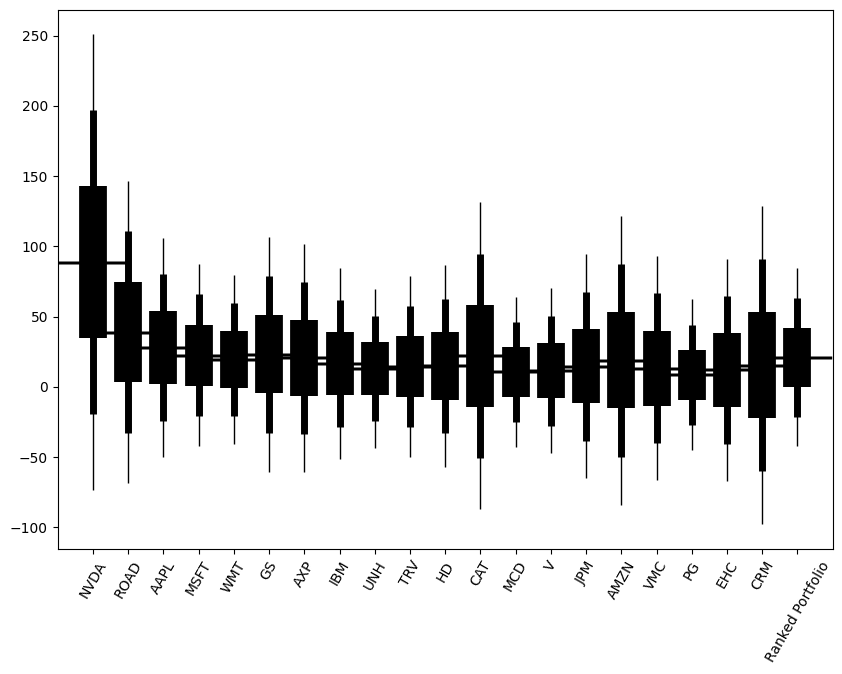

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

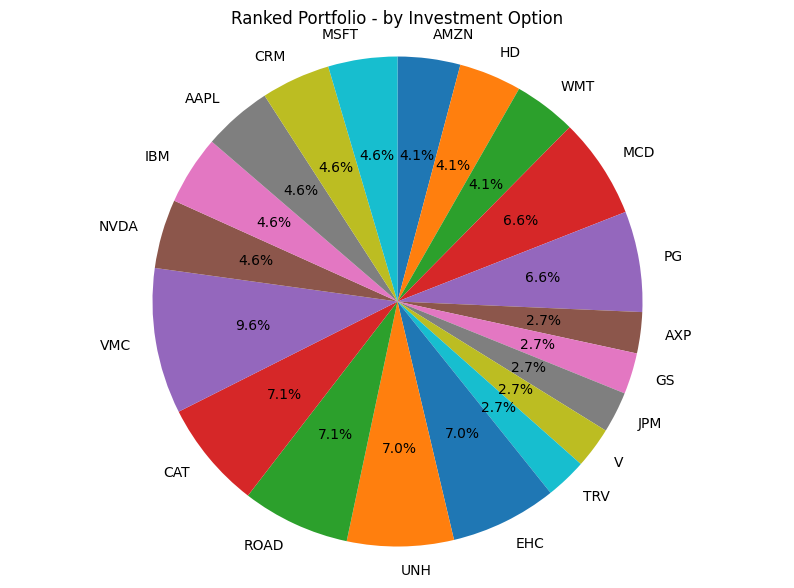

AMZN   0.04
HD     0.04
WMT    0.04
MCD    0.07
PG     0.07
AXP    0.03
GS     0.03
JPM    0.03
V      0.03
TRV    0.03
EHC    0.07
UNH    0.07
ROAD   0.07
CAT    0.07
VMC    0.10
NVDA   0.05
IBM    0.05
AAPL   0.05
CRM    0.05
MSFT   0.05



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    NVDA                           0.0456
    ROAD                           0.0712
    AAPL                           0.0456
    MSFT                           0.0456
    WMT                            0.0413
    GS                             0.0271
    AXP                            0.0271
    IBM                            0.0456
    UNH                            0.0703
    TRV                            0.0271
    HD                             0.0413
    CAT                            0.0712
    MCD                            0.0664
    V                              0.0271
    JPM                            0.0271
    AMZN                           0.0413
    VMC                            0.0961
    PG                             0.0664
    EHC                            0.0703
    CRM                            0.0456


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer............

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.35
    annual_return              28.93
    std_dev                    21.38
    worst typical down year   -13.82
    black_swan                -35.20


Ranked Portfolio Weights:
    NVDA                           0.1200
    ROAD                           0.1300
    AAPL                           0.0900
    MSFT                           0.0400
    WMT                            0.0800
    GS                             0.1300
    AXP                            0.0600
    IBM                            0.0000
    UNH                            0.0300
    TRV                            0.0800
    HD                             0.0000
    CAT                            0.0000
    MCD                            0.0800
    V                              0.0600
    JPM                            0.0000
    AMZN                           0.0000
    VMC                            0.0000
    P

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).